# Final Project Title(TBD)

- Nicolas Colebank
- Andrew Consiglio
- Cristina De La Torre

# Abstract

TO DO

# Research Question

Is there a relationship between past extreme weather events such as **[insert specifc weather used]** from 2018-2023, recent climate opinions from 2023, and policy **[are we still keeping this?]**  across states in the United States? Does this relationship vary in regards to state?
<br><br>

We define climate opinion to be based upon the responses of adults to the following questions: 
- Is global warming is affecting the weather? 
- Are you worried about global warming?
- Do you support regulating CO2 as a pollutant?
- Should global warming be a priority for the next president and Congress?
- Do you discuss global warming at least occasionally? 

# Background (WIP)

> Why is this problem relevant? Or, what inspired you to investigate this problem?

Global warming and the effects of environmental issues at large remain relevant especially with recent patterns of natural disasters and climate change in the United States. Yet, developing effective ways with which to address the impacts of these issues remain challenging at a national scale. We want to assess this challenge by investigating possible factors that may explain the difficulty in addressing environmental issues across the country. More specifically we will be investigating these factors in relation to local extreme weather events.

 The complexity of this problem may be shaped by polarized public perception and local experiences, and so the factors we will assess will focus on local sentiment and socioeconomic elements. Analyzing sentiment such as beliefs, risk perceptions, policy support, and behaviors at a local level might lead to a richer understanding of diverse opinions. To develop larger contextual comprehension, analyzing trends of local natural disasters and environmental issues like fracking and pollution may be useful along with an investigation of local governments, their policies, and access to resources.
 
It is through an analysis of extreme weather and these factors that we would like to work towards developing effective ways to address the impact of climate change at the federal level. Hence, exploring the relationship between severe weather, public opinion, and socioeconomic disparities is particularly important because it can provide a contextual framework with which to tackle the challenge of developing effective solutions to mitigate the effects of environmental issues. 


# Hypothesis

There exist a relationship between recent climate opinions and extreme weather events such that as the frequency of extreme weather events increases so does negative opinions on climate.

(TO DO Rationale) This is due to previously mentioned study in which __ . 

# Data(WIP)

>Where did you get the data from?<br>
>Description of the data

There are a few datasets that would prove useful for making a statistical analysis to help answer this problem. For one, Yale has a dataset containing climate opinion data in the U.S. down to the county, where respondents were asked questions such as “Is climate change happening?” or questions about who should act and what policies should be implemented to affect global warming. Additionally, the National Oceanic and Atmospheric Administration (NOAA) has data on extreme weather events throughout the U.S., dating back to 1950. Harvard’s county-level dataset on U.S. Senate voting can be used to see how partisan voting influences climate change as well. All of these datasets can be downloaded as CSV files. We will use python’s pandas library to merge these datasets together, which can be done by using county name + state, which when combined is always a unique identifier. For the dataset on extreme weather events, the data can only be downloaded by type of weather event. We will pick the most common extreme weather events and use these in our main dataset.


- Yale dataset:
    - sample size>31000


## Data Cleaning and Transformation

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Climate Opinion Data

In [2]:
yale_climate = pd.read_csv('data/yale_climate.csv')
yale_climate.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023
0,state,1,Alabama,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.66,49.22,53.33,53.64,49.63,50.28
1,state,2,Alaska,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.48,54.94,60.92,62.25,59.17,60.66
2,state,4,Arizona,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.32,58.40,63.55,64.22,61.73,63.12
3,state,5,Arkansas,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.17,50.78,55.72,55.89,51.26,52.43
4,state,6,California,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.21,64.51,69.28,70.14,67.47,68.39


In [3]:
yale_climate = yale_climate[yale_climate['geotype'] == 'state']
yale_climate = yale_climate[['geoname','varname', 'x2018', 'x2019', 'x2020', 'x2021', 'x2022', 'x2023']]

#consistent state names across both datasets
yale_climate['geoname'] = yale_climate['geoname'].str.upper() 
yale_climate.head()

,geoname,varname,x2018,x2019,x2020,x2021,x2022,x2023
0,ALABAMA,affectweather,52.66,49.22,53.33,53.64,49.63,50.28
1,ALASKA,affectweather,57.48,54.94,60.92,62.25,59.17,60.66
2,ARIZONA,affectweather,60.32,58.40,63.55,64.22,61.73,63.12
3,ARKANSAS,affectweather,53.17,50.78,55.72,55.89,51.26,52.43
4,CALIFORNIA,affectweather,67.21,64.51,69.28,70.14,67.47,68.39


In [4]:
melted = pd.melt(yale_climate, id_vars=['geoname', 'varname'], var_name='year', value_name='percentage')
melted['year'] = melted['year'].str.replace('x','').astype(int)
yale_climate = melted
yale_climate.head()

,geoname,varname,year,percentage
0,ALABAMA,affectweather,2018,52.66
1,ALASKA,affectweather,2018,57.48
2,ARIZONA,affectweather,2018,60.32
3,ARKANSAS,affectweather,2018,53.17
4,CALIFORNIA,affectweather,2018,67.21


### Storm Data

In [5]:
df = pd.read_csv('data/storm_dataset2023.csv')
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202310,25,230,202310,27,551,186682,1145781,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 7.5 inches at Black Tiger Bay C...,CSV
1,202310,25,230,202310,27,1437,186682,1145783,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Local Police Department relays storm total sno...,CSV
2,202310,25,230,202310,27,1126,186682,1145784,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 10 inches of storm total snowfa...,CSV
3,202310,25,230,202310,27,1301,186682,1145796,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Emergency Manager reports 6 inches of storm to...,CSV
4,202310,25,230,202310,27,600,186682,1145884,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",CoCoRaHS Station ND-GF-23 reports 8.8 inches o...,CSV


In [6]:
#there are multiple events for the same episode, this removes them
unique = df.drop_duplicates(subset=['STATE_FIPS', 'EPISODE_ID']) 
agg_funcs = {
    'EVENT_ID': 'count',
    'YEAR': 'first',
}

by_state = unique.groupby('STATE').agg(agg_funcs).reset_index()
by_state = by_state.rename({'EVENT_ID': 'COUNT'}, axis=1)

#only columns we might use
events = unique[['STATE', 'EVENT_TYPE', 'YEAR', 'EPISODE_ID', 'EPISODE_NARRATIVE']] 
events

,STATE,EVENT_TYPE,YEAR,EPISODE_ID,EPISODE_NARRATIVE
0,NORTH DAKOTA,Heavy Snow,2023,186682,"In late October, a winter storm dumped heavy s..."
6,MISSISSIPPI,Thunderstorm Wind,2023,180848,"In the afternoon and evening of the 24th, clus..."
7,MINNESOTA,Drought,2023,186724,D2 Drought continued from September into early...
9,ILLINOIS,Thunderstorm Wind,2023,184619,A vigorous short-wave trough interacted with a...
11,VIRGINIA,Thunderstorm Wind,2023,185704,Scattered severe thunderstorms in advance of a...
...,...,...,...,...,...
74851,TEXAS,Thunderstorm Wind,2023,186385,Thunderstorms developed along a cold front as ...
74858,NEW HAMPSHIRE,Flash Flood,2023,184741,An area of low pressure moved northeast from M...
74863,TEXAS,Wildfire,2023,185514,"While weather conditions were pretty tame, we ..."
74864,TEXAS,Wildfire,2023,185515,Hot conditions continued for the eastern Panha...


In [7]:
event_dfs = []
by_state_dfs = []
def load_storm(year):
    df = pd.read_csv(f'data/storm_dataset{year}.csv')
    unique = df.drop_duplicates(subset=['STATE_FIPS', 'EPISODE_ID']) #there are multiple events for the same episode, this removes them
    agg_funcs = {
        'EVENT_ID': 'count',
        'YEAR': 'first',
    }
    by_state = unique.groupby('STATE').agg(agg_funcs).reset_index()
    by_state = by_state.rename({'EVENT_ID': 'COUNT'}, axis=1)
    events = unique[['STATE', 'EVENT_TYPE', 'YEAR', 'EPISODE_ID', 'EPISODE_NARRATIVE']] #only columns we might use
    event_dfs.append(events)
    by_state_dfs.append(by_state)

In [8]:
years = [2018 + i for i in range(6)]
for year in years:
    load_storm(year)

In [9]:
#note: some 'states' on here are not actual states (like Lake Superior) - we will ignore these for now
events_df = pd.concat(event_dfs, axis=0)
event_count_df = pd.concat(by_state_dfs, axis=0)
event_count_df

,STATE,COUNT,YEAR
0,ALABAMA,149,2018
1,ALASKA,68,2018
2,AMERICAN SAMOA,19,2018
3,ARIZONA,277,2018
4,ARKANSAS,191,2018
...,...,...,...
62,VIRGINIA,212,2023
63,WASHINGTON,107,2023
64,WEST VIRGINIA,131,2023
65,WISCONSIN,211,2023


In [10]:
events_df_merged = events_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname','year'])

#data for each event type along with yale climate data
events_df_merged = events_df_merged.drop(columns=['geoname', 'year']) 

In [11]:
event_count_merged = event_count_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname', 'year'])

#data with number of events for each year along with the yale climate data
event_count_merged = event_count_merged.drop(columns=['geoname', 'year']) 

In [12]:
#TODO identify questions and filter dfs for each question

# EDA

In [13]:
...

Ellipsis

### Most common weather events by state:

Some states naturally have more extreme weather events because of their geographical location. By analyzing which weather events are most prevalent in each state and matching it with our research on what events are most driven by climate change, we can select the best states to single out when we do our hypothesis testing.

In [14]:
#For each state, here are the counts of each type of weather event
event_counts = events.groupby(['STATE', 'EVENT_TYPE']).size().reset_index(name='counts')
event_counts

,STATE,EVENT_TYPE,counts
0,ALABAMA,Drought,23
1,ALABAMA,Excessive Heat,8
2,ALABAMA,Flash Flood,5
3,ALABAMA,Flood,2
4,ALABAMA,Frost/Freeze,10
...,...,...,...
885,WYOMING,Strong Wind,2
886,WYOMING,Thunderstorm Wind,39
887,WYOMING,Tornado,4
888,WYOMING,Winter Storm,31


In [15]:
#Now just the most common weather event for each state
most_common_events = event_counts.loc[event_counts.groupby('STATE')['counts'].idxmax()]
most_common_events

,STATE,EVENT_TYPE,counts
11,ALABAMA,Thunderstorm Wind,78
14,ALASKA,Blizzard,30
27,AMERICAN SAMOA,Flash Flood,5
50,ARIZONA,Thunderstorm Wind,37
66,ARKANSAS,Thunderstorm Wind,62
...,...,...,...
822,VIRGINIA,Thunderstorm Wind,91
838,WASHINGTON,Heavy Snow,29
854,WEST VIRGINIA,Thunderstorm Wind,43
864,WISCONSIN,Hail,48


### Change in events:
Let's also look at how the number of weather events has changed over time in each state. We'll look at the averages for the first 2 years (2018/2019) vs last 2 years (2022/2023) of our data. While the scope may be small, it gives us some sort of idea of how weather events have been changing by state the past few years.

In [16]:
#Averages of first 2 years
event_years_first = event_count_df[event_count_df['YEAR'].isin([2018, 2019])]
event_years_first = event_years_first.groupby('STATE')['COUNT'].mean().reset_index()
event_years_first

,STATE,COUNT
0,ALABAMA,153.0
1,ALASKA,72.0
2,AMERICAN SAMOA,19.0
3,ARIZONA,245.0
4,ARKANSAS,188.5
...,...,...
62,VIRGINIA,302.5
63,WASHINGTON,110.5
64,WEST VIRGINIA,182.0
65,WISCONSIN,219.5


In [17]:
#Averages of last 2 years
event_years_second = event_count_df[event_count_df['YEAR'].isin([2022, 2023])]
event_years_second = event_years_second.groupby('STATE')['COUNT'].mean().reset_index()
event_years_second

,STATE,COUNT
0,ALABAMA,176.5
1,ALASKA,135.0
2,AMERICAN SAMOA,15.0
3,ARIZONA,228.0
4,ARKANSAS,201.5
...,...,...
63,VIRGINIA,231.0
64,WASHINGTON,124.5
65,WEST VIRGINIA,140.5
66,WISCONSIN,182.5


In [18]:
#Differences by state
merged_states = pd.merge(event_years_first, event_years_second, on='STATE', suffixes=('_df1', '_df2'))
merged_states['count_difference'] = merged_states['COUNT_df2'] - merged_states['COUNT_df1']
merged_states = merged_states.sort_values('count_difference', ascending=False)
merged_states
print(merged_states.iloc[:10])

          STATE  COUNT_df1  COUNT_df2  count_difference
57        TEXAS      568.5      802.0             233.5
1        ALASKA       72.0      135.0              63.0
48     OKLAHOMA      205.5      265.0              59.5
40       NEVADA      108.0      156.5              48.5
13      FLORIDA      260.0      303.0              43.0
39     NEBRASKA      251.0      289.5              38.5
30    LOUISIANA      132.0      169.0              37.0
0       ALABAMA      153.0      176.5              23.5
36  MISSISSIPPI      123.5      145.0              21.5
43   NEW MEXICO      172.0      192.5              20.5


We see the states that saw a biggest increase in events from first 2 to last 2 years were Texas, Alaska, Oklahoma, Nevada, and Florida.
According to PolicyGenius (https://www.policygenius.com/homeowners-insurance/best-and-worst-states-for-climate-change/) the states that will fare worst in the face of climate change are Florida, Mississippi, Louisiana, Texas, and Arkansas. 4 of these states are in the top 10 of increasing weather events.\
One thing to note is states like Texas that are larger experience more events due to their size, so it's also important to factor in percent change.

In [19]:
#percent_change
merged_states['percent_change'] = (merged_states['COUNT_df2'] - merged_states['COUNT_df1'])/merged_states['COUNT_df1']
merged_states = merged_states.sort_values('percent_change', ascending=False)
print(merged_states.iloc[:10])

             STATE  COUNT_df1  COUNT_df2  count_difference  percent_change
15            GUAM        3.0       15.5              12.5        4.166667
60  VIRGIN ISLANDS        3.0        7.0               4.0        1.333333
27    LAKE ONTARIO        6.0       12.0               6.0        1.000000
55   ST LAWRENCE R        1.0        2.0               1.0        1.000000
1           ALASKA       72.0      135.0              63.0        0.875000
29   LAKE SUPERIOR       22.0       35.5              13.5        0.613636
40          NEVADA      108.0      156.5              48.5        0.449074
51     PUERTO RICO       39.0       56.5              17.5        0.448718
57           TEXAS      568.5      802.0             233.5        0.410730
10        DELAWARE       28.0       37.5               9.5        0.339286


### Outliers

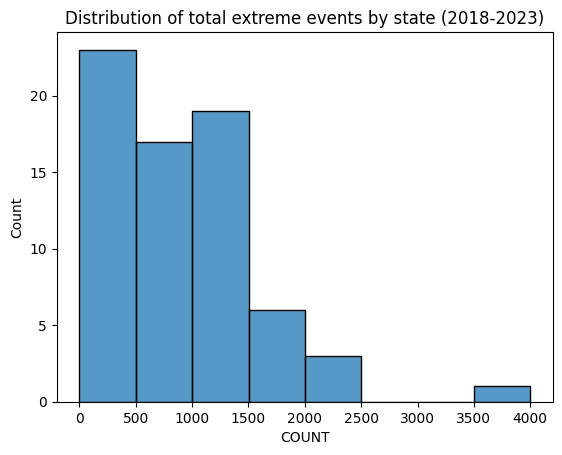

In [27]:
count_sum = event_count_df.groupby('STATE').sum(numeric_only=True)
sns.histplot(data=count_sum, x='COUNT')
plt.title('Distribution of total extreme events by state (2018-2023)')
plt.show()

It looks like most states are between 0 and 2500 events in this period, with the exception of one. Lets look at this outlier:

In [28]:
outlier = count_sum[count_sum['COUNT'] > 2500]
outlier

,COUNT,YEAR
STATE,,
TEXAS,4001,12123


As we can see from the code above, this outlier is Texas. As Texas is the second largest state in the US by land area, this checks out. 

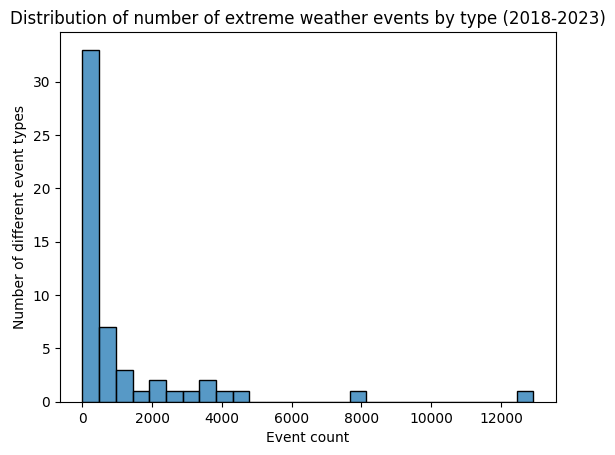

In [31]:
event_type_sum = events_df.groupby('EVENT_TYPE').count()
sns.histplot(data=event_type_sum, x='EPISODE_ID')
plt.title('Distribution of number of extreme weather events by type (2018-2023)')
plt.xlabel('Event count')
plt.ylabel('Number of different event types')
plt.show()

This histogram suggests that there are two outliers in event type: one with around 8,000 events and another with over 12,000. Lets see what they are:

In [32]:
outliers = event_type_sum[event_type_sum['EPISODE_ID'] > 7000]
outliers

,STATE,YEAR,EPISODE_ID,EPISODE_NARRATIVE
EVENT_TYPE,,,,
Hail,7845,7845,7845,7845
Thunderstorm Wind,12930,12930,12930,12930


The two outlier event types are hail and thunderstorm wind. These events are typically less extreme and more common, explaining why they are much more frequent than the other event types.

As for the Yale Climate dataset, lets look at some of the most pertinent questions and their distributions across states:

1. Average estimated percentage who somewhat/strongly agree that global warming is affecting the weather in the United States

<AxesSubplot: xlabel='percentage', ylabel='Count'>

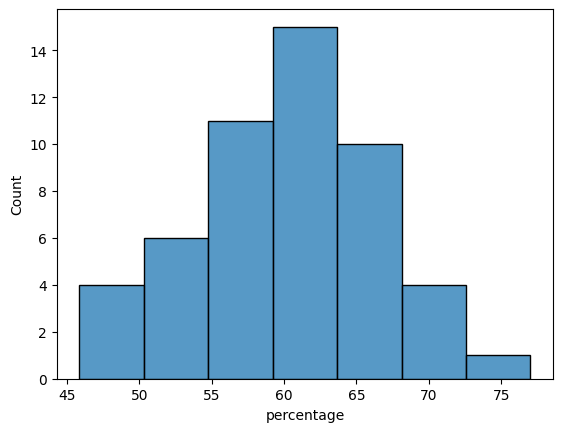

In [41]:
affect_weather = yale_climate[yale_climate['varname'] == 'affectweather'].groupby('geoname').mean(numeric_only=True)
sns.histplot(data=affect_weather, x='percentage')

This distribution is roughly normal with no significant outliers. Lets see if other questions follow a similar distribution.

2. Average estimated percentage who are somewhat/very worried about global warming

<AxesSubplot: xlabel='percentage', ylabel='Count'>

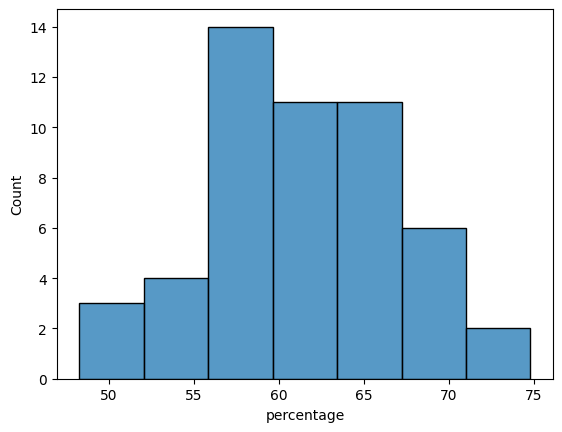

In [42]:
worried = yale_climate[yale_climate['varname'] == 'worried'].groupby('geoname').mean(numeric_only=True)
sns.histplot(data=worried, x='percentage')

Although this distribution is slightly different, it still follows a roughly normal distribution, with the percentages still lying within 45-75%. 

3. Average estimated percentage who somewhat/strongly support funding research into renewable energy sources

<AxesSubplot: xlabel='percentage', ylabel='Count'>

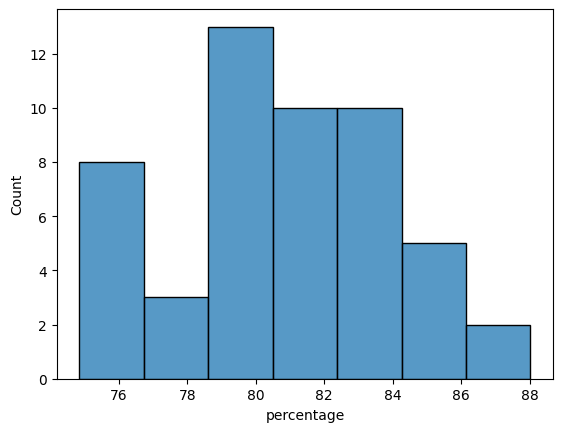

In [43]:
research = yale_climate[yale_climate['varname'] == 'fundrenewables'].groupby('geoname').mean(numeric_only=True)
sns.histplot(data=research, x='percentage')

This distribution also contains no significant outliers, but it does tend to be more skewed right than the other distributions. It also has a much higher range than the other questions.

### Missingness

Lets start by looking at the amount of null values per column:

In [33]:
event_count_merged.isnull().sum()

STATE            0
COUNT            0
YEAR             0
varname          0
percentage    3774
dtype: int64

In [35]:
events_df_merged.isnull().sum()

STATE                     0
EVENT_TYPE                0
YEAR                      0
EPISODE_ID                0
EPISODE_NARRATIVE         0
varname                   0
percentage           685645
dtype: int64

For both of the DataFrames in question, there are no null values from the extreme weather event data (at least for the columns of interest). However, there are many null values in the 'percentage' column, suggesting that there are null values from the Yale Climate dataset.

Lets see what the rows with the null values look like:

In [37]:
event_count_merged[event_count_merged['percentage'].isnull()]['varname'].unique()

array(['expOppose', 'generaterenewable', 'generaterenewableOppose',
       'gwvoteimp', 'gwvoteimpOppose', 'president', 'presidentOppose',
       'priority', 'priorityOppose', 'prioritycleanenergy',
       'prioritycleanenergyOppose', 'taxdividend', 'taxdividendOppose',
       'trustclimscisst', 'trustclimscisstOppose', 'prienv',
       'prienvOppose', 'important', 'co2limits', 'co2limitsOppose',
       'supportrps', 'supportrpsOppose'], dtype=object)

These null values look to be tied to specific questions. Depending on what questions are investigated, this could prove to be an issue.

# Analysis

> What (if any) analyses have already been performed on this data (or another similar dataset)?<br>
> You should provide references to this<br>
> What types of analyses did you perform?

In [21]:
...

Ellipsis

# Discussion and Conclusion

> How do you interpret the results from these analyses?
> What are some potential limitations and shortcoming of your analyses?